In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
e_c = pd.read_csv('../datasets/energy_consumption.csv')

In [31]:
e_c.columns = e_c.columns.str.strip().str.lower().str.replace(' ','_')
e_c = e_c.rename(columns={'zone_1_power_consumption': 'zone_1_pwc',
                          'zone_2__power_consumption': 'zone_2_pwc',
                          'zone_3__power_consumption': 'zone_3_pwc'})

e_c['datetime'] = pd.to_datetime(e_c['datetime'])
e_c.set_index('datetime', inplace=True)

In [ ]:
# Se crea una nueva columna con la suma de la demanda por zona
e_c['total_pwc'] = e_c['zone_1_pwc'] + e_c['zone_2_pwc'] + e_c['zone_3_pwc']


# Se reagrupan los datos por hora, usando promedio para suavizar
e_c_hourly = e_c['total_pwc'].resample('h').mean()
e_c_hourly



datetime
2017-01-01 00:00:00    66476.770597
2017-01-01 01:00:00    57778.526210
2017-01-01 02:00:00    52089.881640
2017-01-01 03:00:00    48914.447548
2017-01-01 04:00:00    47714.638347
                           ...     
2017-12-30 19:00:00    86938.284345
2017-12-30 20:00:00    86027.923118
2017-12-30 21:00:00    82724.959655
2017-12-30 22:00:00    78085.742405
2017-12-30 23:00:00    69964.971238
Freq: h, Name: total_pwc, Length: 8736, dtype: float64

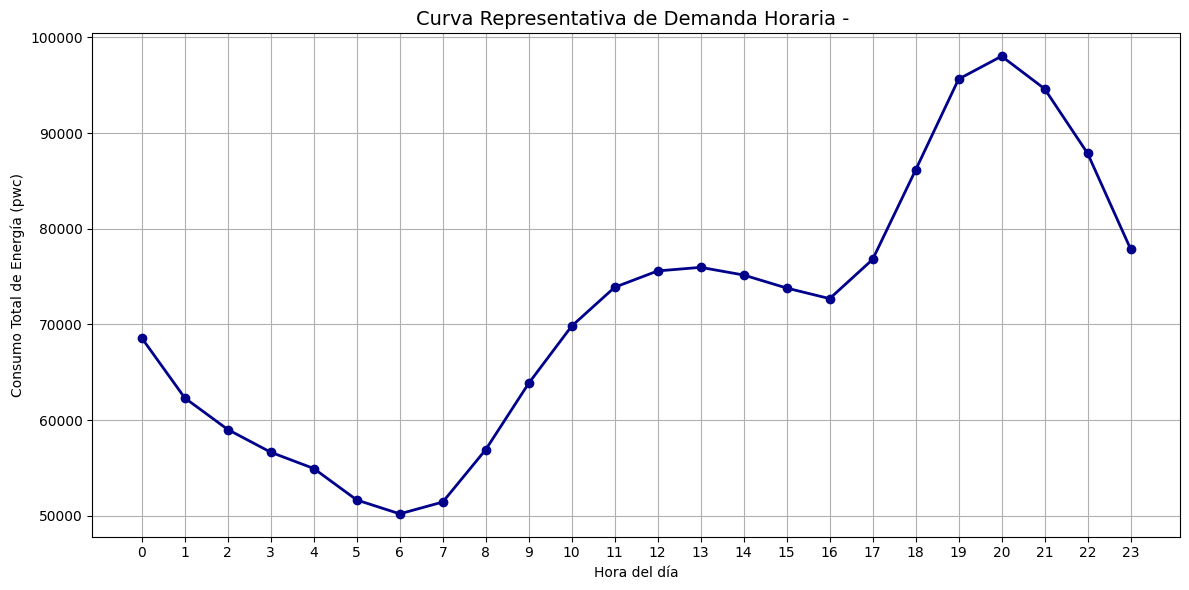

In [33]:
# Se extrae la hora de cada timestamp
e_c_hourly = e_c_hourly.to_frame()
e_c_hourly['hour'] = e_c_hourly.index.hour


# Se agrupa por cada hora del día y se calcula el promedio
curve = e_c_hourly.groupby('hour')['total_pwc'].mean()


# Se genera la gráfica
plt.figure(figsize=(12, 6))
plt.plot(curve.index, curve.values, marker='o', linewidth=2, color='darkblue')
plt.title('Curva Representativa de Demanda Horaria - ', fontsize=14)
plt.xlabel('Hora del día')
plt.ylabel('Consumo Total de Energía (pwc)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

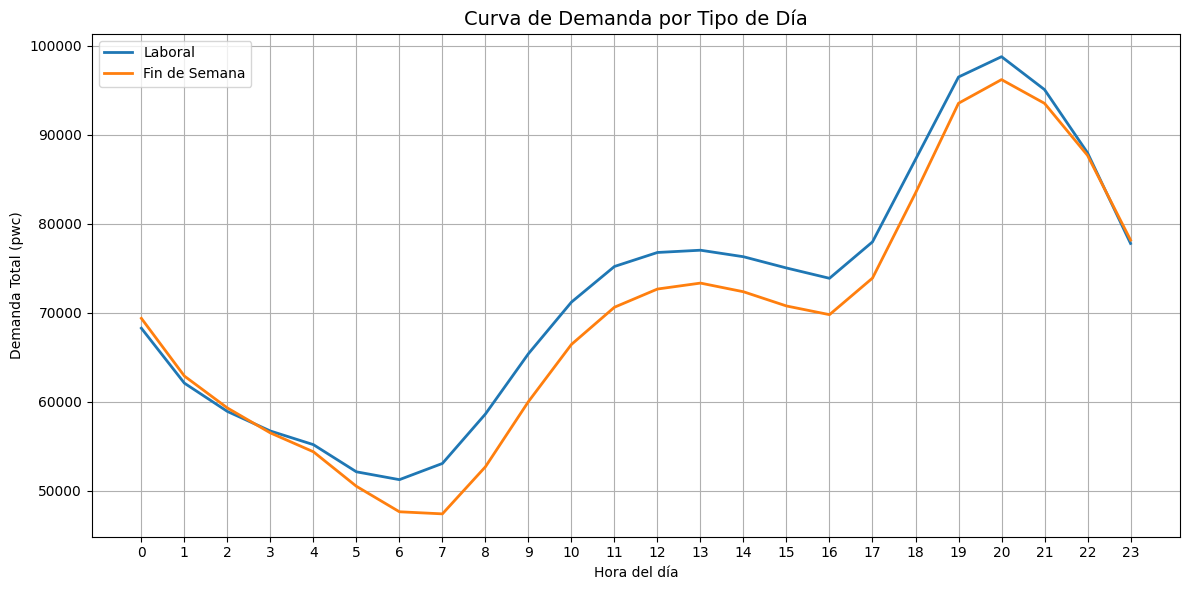

In [37]:
# Se crea columna con el día de la semana (0 = lunes, 6 = domingo)
e_c['weekday'] = e_c.index.weekday

# Se define si es fin de semana (sábado o domingo)
e_c['tipo_dia'] = e_c['weekday'].apply(lambda x: 'Fin de Semana' if x >= 5 else 'Laboral')

# Se asegura tener la suma total de energía por fila
e_c['total_pwc'] = e_c['zone_1_pwc'] + e_c['zone_2_pwc'] + e_c['zone_3_pwc']

# Se resamplea por hora para suavizar y se conserva tipo de día
e_c_hourly['tipo_dia'] = e_c['tipo_dia'].resample('h').first()
e_c_hourly['hour'] = e_c_hourly.index.hour

# Se agrupan los promedios por hora y tipo de día
curvas_tipo_dia = e_c_hourly.groupby(['tipo_dia', 'hour'])['total_pwc'].mean().unstack(0)


plt.figure(figsize=(12, 6))
plt.plot(curvas_tipo_dia.index, curvas_tipo_dia['Laboral'], label='Laboral', linewidth=2)
plt.plot(curvas_tipo_dia.index, curvas_tipo_dia['Fin de Semana'], label='Fin de Semana', linewidth=2)
plt.title('Curva de Demanda por Tipo de Día', fontsize=14)
plt.xlabel('Hora del día')
plt.ylabel('Demanda Total (pwc)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

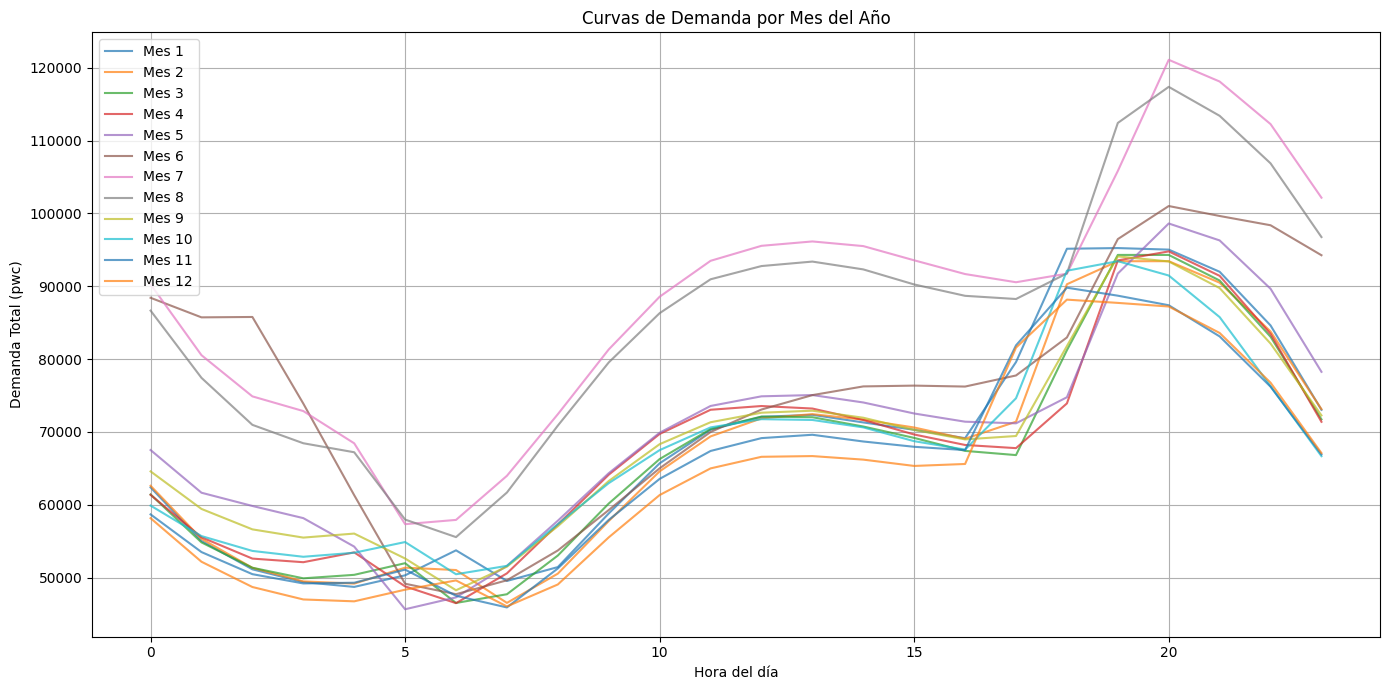

In [38]:
# Se agrega columna con el mes
e_c_hourly['month'] = e_c_hourly.index.month


# Se agrupa por mes y hora
curvas_mensuales = e_c_hourly.groupby(['month', 'hour'])['total_pwc'].mean().unstack(0)


plt.figure(figsize=(14, 7))
for mes in range(1, 13):
    plt.plot(curvas_mensuales.index, curvas_mensuales[mes], label=f'Mes {mes}', alpha=0.7)
plt.title('Curvas de Demanda por Mes del Año')
plt.xlabel('Hora del día')
plt.ylabel('Demanda Total (pwc)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
